# Proyecto Final

Librerias

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import DistilBertModel, DistilBertTokenizer
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


## Tablas

### Importar datasets

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_table_train = r"/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/merged/merged_cleaned_sentiment_train.csv"
path_table_validation = r"/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/merged/merged_cleaned_sentiment_validation.csv"
path_table_test = r"/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/merged/merged_cleaned_sentiment_test.csv"

data_table_train = pd.read_csv(path_table_train)
data_table_validation = pd.read_csv(path_table_validation)
data_table_test = pd.read_csv(path_table_test)

### Funciones

In [ ]:

def extract_features(song_lyrics):
    # Cargar el modelo y el tokenizador
    model_name = 'distilbert-base-uncased'
    tokenizer = DistilBertTokenizer.from_pretrained(model_name)
    model = DistilBertModel.from_pretrained(model_name)

    # Tokenizar la letra de la canción
    inputs = tokenizer(song_lyrics, return_tensors='pt', truncation=True, padding=True)

    # Obtener las representaciones ocultas de la capa intermedia
    outputs = model(**inputs)
    hidden_states = outputs.last_hidden_state

    # Promediar las representaciones de todas las palabras para obtener una representación general
    avg_representation = torch.mean(hidden_states, dim=1).detach().numpy()

    return avg_representation

# Ejemplo de uso
#lyrics_example ="Fast As You Can#"
#features = extract_features(lyrics_example)
#print("Shape de las características:", features.shape)


### Extracción de características de la letra de las canciones para los conjuntos de train, validation y test

In [ ]:
features_list = []
id_list = []


# Iterar sobre las filas del DataFrame
for index, row in data_table_train.iterrows():
    # Extraer características para cada letra de canción
    lyrics_example = row['lyrics_cleaned']
    features = extract_features(lyrics_example)

    # Agregar las características a la lista
    features_list.append(features)

    # Agregar metadatos (puedes obtener esta información de tus datos reales)
    id_list.append(row['id'])
    print(row['id'])


Se truncaron las últimas líneas 5000 del resultado de transmisión.
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
278

In [ ]:
# Aplanar las características
features_array = np.array(features_list).reshape(len(features_list), -1)

# Crear un DataFrame con las características para el conjunto train
df = pd.DataFrame(features_array, columns=[f'lyric_{i}' for i in range(768)])  # Ajusta el número de columnas según las dimensiones reales
df['id'] = id_list

# Guardar en un archivo CSV
df.to_csv('/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/carcateristicas_train.csv', index=True)

In [ ]:
# Aplanar las características
features_array = np.array(features_list).reshape(len(features_list), -1)

# Crear un DataFrame con las características para el conjunto test
df = pd.DataFrame(features_array, columns=[f'lyric_{i}' for i in range(768)])  # Ajusta el número de columnas según las dimensiones reales
df['id'] = id_list

# Guardar en un archivo CSV
df.to_csv('/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/caracteristicas_validation.csv', index=True)

In [ ]:
# Aplanar las características
features_array = np.array(features_list).reshape(len(features_list), -1)

# Crear un DataFrame con las características para el conjunto test
df = pd.DataFrame(features_array, columns=[f'lyric_{i}' for i in range(768)])  # Ajusta el número de columnas según las dimensiones reales
df['id'] = id_list

# Guardar en un archivo CSV
df.to_csv('/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/caracteristicas_test.csv', index=True)

### Carga de datos

In [ ]:
path_train = r"/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/caracteristicas_train.csv"
path_validation = r"/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/caracteristicas_validation.csv"
path_test = r"/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/caracteristicas_test.csv"

#df= pd.read_csv(path_table_train)
df2 = pd.read_csv(path_validation)
df3 = pd.read_csv(path_test)

In [ ]:

features_model=['id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'y_valence', 'y_arousal']

In [ ]:
# Asignar columnas de X y y para la red del conjunto train
data_table_train2 = data_table_train[features_model]

data_train = pd.merge(data_table_train2, df, on='id')
data_train.to_csv('/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/train_features.csv', index=False)

X_train = data_train.drop(['id','y_arousal', 'y_valence'], axis=1)
y_train = data_train[['y_arousal', 'y_valence']]

In [ ]:
# Asignar columnas de X y y para la red del conjunto validation
data_table_validation2 =data_table_validation[features_model]

data_validation = pd.merge(data_table_validation2, df2, on='id')
data_validation = data_validation.drop(data_validation.columns[14], axis=1)
data_validation.to_csv('/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/validation_features.csv', index=False)

X_validation = data_validation.drop(['id','y_arousal', 'y_valence'], axis=1)
y_validation = data_validation[['y_arousal', 'y_valence']]

In [ ]:
# Asignar columnas de X y y para la red del conjunto test
data_table_test2 = data_table_test[features_model]

data_test = pd.merge(data_table_test2, df3, on='id')
data_test = data_test.drop(data_test.columns[14], axis=1)
data_test.to_csv('/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/test_features.csv', index=False)

X_test = data_test.drop(['id','y_arousal', 'y_valence'], axis=1)
y_test = data_test[['y_arousal', 'y_valence']]

## Modelo

### Re-carga de datos

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

path_train = r"/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/train_features.csv"
path_validation = r"/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/validation_features.csv"
path_test = r"/content/drive/MyDrive/3er semestre MMOP/Deep Learning/data/test_features.csv"

data_train = pd.read_csv(path_train)
data_validation = pd.read_csv(path_validation)
data_test = pd.read_csv(path_test)

X_train = data_train.drop(['id','y_arousal', 'y_valence'], axis=1)
y_train = data_train[['y_arousal', 'y_valence']]
X_val = data_validation.drop(['id','y_arousal', 'y_valence'], axis=1)
y_val = data_validation[['y_arousal', 'y_valence']]
X_test = data_test.drop(['id','y_arousal', 'y_valence'], axis=1)
y_test = data_test[['y_arousal', 'y_valence']]

### Modelo Completo

In [ ]:
# Convertir datos a tensores de PyTorch
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values)

X_val_tensor = torch.FloatTensor(X_val.values)
y_val_tensor = torch.FloatTensor(y_val.values)

X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.FloatTensor(y_test.values)

In [ ]:
class CustomNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(CustomNN, self).__init__()

        # Capa de entrada
        self.input_layer = nn.Linear(input_size, hidden_sizes[0])

        # Lista de capas ocultas
        self.hidden_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_sizes[i], hidden_sizes[i+1]),
                nn.Sigmoid()
            )
            for i in range(len(hidden_sizes) - 1)
        ])

        # Capa de salida lineal
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        # Propagación hacia adelante
        x = self.input_layer(x)

        # Propagación a través de capas ocultas
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)

        x = self.output_layer(x)
        return x



In [ ]:

# Dimensiones de entrada, salida y tamaños de las capas ocultas
input_size = X_train.shape[1]  # Ajusta según las dimensiones de tus características
hidden_sizes = [128, 64, 32, 16, 8]  # Puedes ajustar estos valores según sea necesario
output_size = y_train.shape[1]  # Salida para 'y_arousal' y 'y_valence'

# Crear una instancia del modelo
model = CustomNN(input_size, hidden_sizes, output_size)

# Entrenamiento con conjunto de entrenamiento y validación
num_epochs = 300

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Listas para almacenar pérdidas y métricas R2 y MSE
train_losses = []
val_losses = []
train_r2_scores = []
val_r2_scores = []
test_r2_scores = []
train_mse_scores = []
val_mse_scores = []
test_mse_scores = []

for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calcular R2 y MSE en el conjunto de entrenamiento
    train_r2 = r2_score(y_train_tensor.numpy(), outputs.detach().numpy())
    train_mse = mean_squared_error(y_train_tensor.numpy(), outputs.detach().numpy())

    # Validación
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)

    # Calcular R2 y MSE en el conjunto de validación y prueba
    val_r2 = r2_score(y_val_tensor.numpy(), val_outputs.detach().numpy())
    val_mse = mean_squared_error(y_val_tensor.numpy(), val_outputs.detach().numpy())
    test_r2 = r2_score(y_test_tensor.numpy(), test_outputs.detach().numpy())
    test_mse = mean_squared_error(y_test_tensor.numpy(), test_outputs.detach().numpy())

    # Almacenar pérdidas y métricas R2 y MSE
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)
    test_r2_scores.append(test_r2)
    train_mse_scores.append(train_mse)
    val_mse_scores.append(val_mse)
    test_mse_scores.append(test_mse)


    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], ' +
              f'Pérdida Entrenamiento (MSE): {loss.item():.4f}, ' +
              f'Pérdida Validación (MSE): {val_loss.item():.4f}, ' +
              f'Pérdida Prueba (MSE): {test_loss.item():.4f}, ' +
              f'R2 Entrenamiento: {train_r2:.4f}, ' +
              f'R2 Validación: {val_r2:.4f}' +
              f'R2 Prueba: {test_r2:.4f}')


Época [10/300], Pérdida Entrenamiento (MSE): 0.9324, Pérdida Validación (MSE): 0.9280, Pérdida Prueba (MSE): 0.9317, R2 Entrenamiento: 0.0956, R2 Validación: 0.0629R2 Prueba: 0.0752
Época [20/300], Pérdida Entrenamiento (MSE): 0.8230, Pérdida Validación (MSE): 0.8531, Pérdida Prueba (MSE): 0.8630, R2 Entrenamiento: 0.1978, R2 Validación: 0.1360R2 Prueba: 0.1401
Época [30/300], Pérdida Entrenamiento (MSE): 0.8152, Pérdida Validación (MSE): 0.8314, Pérdida Prueba (MSE): 0.8437, R2 Entrenamiento: 0.2055, R2 Validación: 0.1575R2 Prueba: 0.1590
Época [40/300], Pérdida Entrenamiento (MSE): 0.8120, Pérdida Validación (MSE): 0.8303, Pérdida Prueba (MSE): 0.8439, R2 Entrenamiento: 0.2088, R2 Validación: 0.1592R2 Prueba: 0.1591
Época [50/300], Pérdida Entrenamiento (MSE): 0.8090, Pérdida Validación (MSE): 0.8321, Pérdida Prueba (MSE): 0.8447, R2 Entrenamiento: 0.2114, R2 Validación: 0.1573R2 Prueba: 0.1583
Época [60/300], Pérdida Entrenamiento (MSE): 0.8082, Pérdida Validación (MSE): 0.8315, Pér

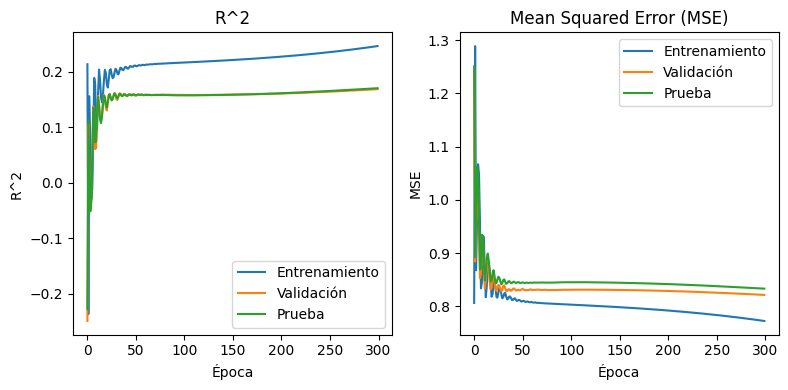

In [ ]:


plt.figure(figsize=(8, 4))
# Gráficas de R2
plt.subplot(1, 2, 1)
plt.plot(train_r2_scores, label='Entrenamiento')
plt.plot(val_r2_scores, label='Validación')
plt.plot(test_r2_scores, label='Prueba')
plt.title('R^2')
plt.xlabel('Época')
plt.ylabel('R^2')
plt.legend()

# Gráficas de MSE
plt.subplot(1, 2, 2)
plt.plot(train_mse_scores, label='Entrenamiento')
plt.plot(val_mse_scores, label='Validación')
plt.plot(test_mse_scores, label='Prueba')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

### Modelo música

In [ ]:
# Convertir datos a tensores de PyTorch
features_separar=['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']

X_train_m=X_train[features_separar]
X_train_tensor = torch.FloatTensor(X_train_m.values)

X_val_m=X_val[features_separar]
X_val_tensor = torch.FloatTensor(X_val_m.values)

X_test_m=X_test[features_separar]
X_test_tensor = torch.FloatTensor(X_test_m.values)

In [ ]:

# Dimensiones de entrada, salida y tamaños de las capas ocultas
input_size = X_train_m.shape[1]  # Ajusta según las dimensiones de tus características
hidden_sizes = [128, 64, 32, 16, 8]  # Puedes ajustar estos valores según sea necesario
output_size = y_train.shape[1]  # Salida para 'y_arousal' y 'y_valence'

# Crear una instancia del modelo
model = CustomNN(input_size, hidden_sizes, output_size)

# Entrenamiento con conjunto de entrenamiento y validación
num_epochs = 300

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Listas para almacenar pérdidas y métricas R2 y MSE
train_losses = []
val_losses = []
train_r2_scores = []
val_r2_scores = []
test_r2_scores = []
train_mse_scores = []
val_mse_scores = []
test_mse_scores = []

for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calcular R2 y MSE en el conjunto de entrenamiento
    train_r2 = r2_score(y_train_tensor.numpy(), outputs.detach().numpy())
    train_mse = mean_squared_error(y_train_tensor.numpy(), outputs.detach().numpy())

    # Validación
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)

    # Calcular R2 y MSE en el conjunto de validación y prueba
    val_r2 = r2_score(y_val_tensor.numpy(), val_outputs.detach().numpy())
    val_mse = mean_squared_error(y_val_tensor.numpy(), val_outputs.detach().numpy())
    test_r2 = r2_score(y_test_tensor.numpy(), test_outputs.detach().numpy())
    test_mse = mean_squared_error(y_test_tensor.numpy(), test_outputs.detach().numpy())

    # Almacenar pérdidas y métricas R2 y MSE
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)
    test_r2_scores.append(test_r2)
    train_mse_scores.append(train_mse)
    val_mse_scores.append(val_mse)
    test_mse_scores.append(test_mse)


    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], ' +
              f'Pérdida Entrenamiento (MSE): {loss.item():.4f}, ' +
              f'Pérdida Validación (MSE): {val_loss.item():.4f}, ' +
              f'Pérdida Prueba (MSE): {test_loss.item():.4f}, ' +
              f'R2 Entrenamiento: {train_r2:.4f}, ' +
              f'R2 Validación: {val_r2:.4f}' +
              f'R2 Prueba: {test_r2:.4f}')


Época [10/300], Pérdida Entrenamiento (MSE): 1.0569, Pérdida Validación (MSE): 1.0080, Pérdida Prueba (MSE): 1.0328, R2 Entrenamiento: -0.0229, R2 Validación: -0.0185R2 Prueba: -0.0248
Época [20/300], Pérdida Entrenamiento (MSE): 1.0409, Pérdida Validación (MSE): 0.9945, Pérdida Prueba (MSE): 1.0166, R2 Entrenamiento: -0.0075, R2 Validación: -0.0051R2 Prueba: -0.0087
Época [30/300], Pérdida Entrenamiento (MSE): 1.0341, Pérdida Validación (MSE): 0.9894, Pérdida Prueba (MSE): 1.0095, R2 Entrenamiento: -0.0010, R2 Validación: -0.0001R2 Prueba: -0.0016
Época [40/300], Pérdida Entrenamiento (MSE): 1.0324, Pérdida Validación (MSE): 0.9887, Pérdida Prueba (MSE): 1.0075, R2 Entrenamiento: 0.0006, R2 Validación: 0.0006R2 Prueba: 0.0004
Época [50/300], Pérdida Entrenamiento (MSE): 1.0320, Pérdida Validación (MSE): 0.9885, Pérdida Prueba (MSE): 1.0069, R2 Entrenamiento: 0.0010, R2 Validación: 0.0008R2 Prueba: 0.0011
Época [60/300], Pérdida Entrenamiento (MSE): 1.0312, Pérdida Validación (MSE): 0.

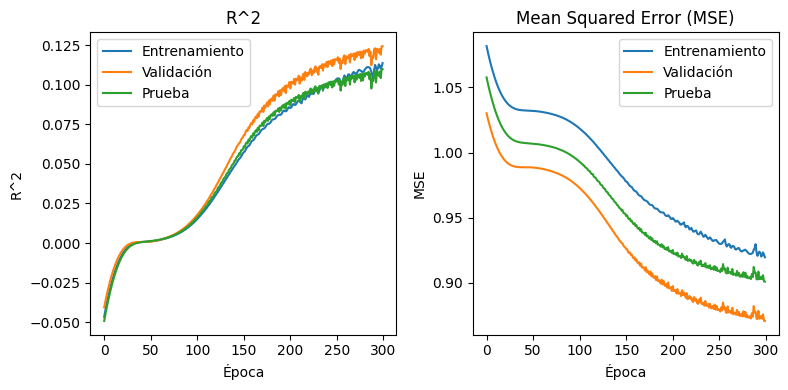

In [ ]:


plt.figure(figsize=(8, 4))
# Gráficas de R2
plt.subplot(1, 2, 1)
plt.plot(train_r2_scores, label='Entrenamiento')
plt.plot(val_r2_scores, label='Validación')
plt.plot(test_r2_scores, label='Prueba')
plt.title('R^2')
plt.xlabel('Época')
plt.ylabel('R^2')
plt.legend()

# Gráficas de MSE
plt.subplot(1, 2, 2)
plt.plot(train_mse_scores, label='Entrenamiento')
plt.plot(val_mse_scores, label='Validación')
plt.plot(test_mse_scores, label='Prueba')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

### Modelo letra

In [ ]:
# Convertir datos a tensores de PyTorch
features_separar=['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']

X_train_l=X_train.drop(features_separar, axis=1)
X_train_tensor = torch.FloatTensor(X_train_l.values)

X_val_l=X_val.drop(features_separar, axis=1)
X_val_tensor = torch.FloatTensor(X_val_l.values)

X_test_l=X_test.drop(features_separar, axis=1)
X_test_tensor = torch.FloatTensor(X_test_l.values)

In [ ]:

# Dimensiones de entrada, salida y tamaños de las capas ocultas
input_size = X_train_l.shape[1]  # Ajusta según las dimensiones de tus características
hidden_sizes = [128, 64, 32, 16, 8]  # Puedes ajustar estos valores según sea necesario
output_size = y_train.shape[1]  # Salida para 'y_arousal' y 'y_valence'

# Crear una instancia del modelo
model = CustomNN(input_size, hidden_sizes, output_size)

# Entrenamiento con conjunto de entrenamiento y validación
num_epochs = 500

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Listas para almacenar pérdidas y métricas R2 y MSE
train_losses = []
val_losses = []
train_r2_scores = []
val_r2_scores = []
test_r2_scores = []
train_mse_scores = []
val_mse_scores = []
test_mse_scores = []

for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calcular R2 y MSE en el conjunto de entrenamiento
    train_r2 = r2_score(y_train_tensor.numpy(), outputs.detach().numpy())
    train_mse = mean_squared_error(y_train_tensor.numpy(), outputs.detach().numpy())

    # Validación
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)

    # Calcular R2 y MSE en el conjunto de validación y prueba
    val_r2 = r2_score(y_val_tensor.numpy(), val_outputs.detach().numpy())
    val_mse = mean_squared_error(y_val_tensor.numpy(), val_outputs.detach().numpy())
    test_r2 = r2_score(y_test_tensor.numpy(), test_outputs.detach().numpy())
    test_mse = mean_squared_error(y_test_tensor.numpy(), test_outputs.detach().numpy())

    # Almacenar pérdidas y métricas R2 y MSE
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)
    test_r2_scores.append(test_r2)
    train_mse_scores.append(train_mse)
    val_mse_scores.append(val_mse)
    test_mse_scores.append(test_mse)


    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], ' +
              f'Pérdida Entrenamiento (MSE): {loss.item():.4f}, ' +
              f'Pérdida Validación (MSE): {val_loss.item():.4f}, ' +
              f'Pérdida Prueba (MSE): {test_loss.item():.4f}, ' +
              f'R2 Entrenamiento: {train_r2:.4f}, ' +
              f'R2 Validación: {val_r2:.4f}' +
              f'R2 Prueba: {test_r2:.4f}')


Época [10/500], Pérdida Entrenamiento (MSE): 1.1321, Pérdida Validación (MSE): 1.0792, Pérdida Prueba (MSE): 1.1098, R2 Entrenamiento: -0.1019, R2 Validación: -0.0954R2 Prueba: -0.1081
Época [20/500], Pérdida Entrenamiento (MSE): 1.0911, Pérdida Validación (MSE): 1.0409, Pérdida Prueba (MSE): 1.0685, R2 Entrenamiento: -0.0597, R2 Validación: -0.0545R2 Prueba: -0.0643
Época [30/500], Pérdida Entrenamiento (MSE): 1.0638, Pérdida Validación (MSE): 1.0157, Pérdida Prueba (MSE): 1.0408, R2 Entrenamiento: -0.0315, R2 Validación: -0.0278R2 Prueba: -0.0350
Época [40/500], Pérdida Entrenamiento (MSE): 1.0472, Pérdida Validación (MSE): 1.0008, Pérdida Prueba (MSE): 1.0238, R2 Entrenamiento: -0.0146, R2 Validación: -0.0121R2 Prueba: -0.0170
Época [50/500], Pérdida Entrenamiento (MSE): 1.0384, Pérdida Validación (MSE): 0.9932, Pérdida Prueba (MSE): 1.0146, R2 Entrenamiento: -0.0056, R2 Validación: -0.0041R2 Prueba: -0.0073
Época [60/500], Pérdida Entrenamiento (MSE): 1.0345, Pérdida Validación (MS

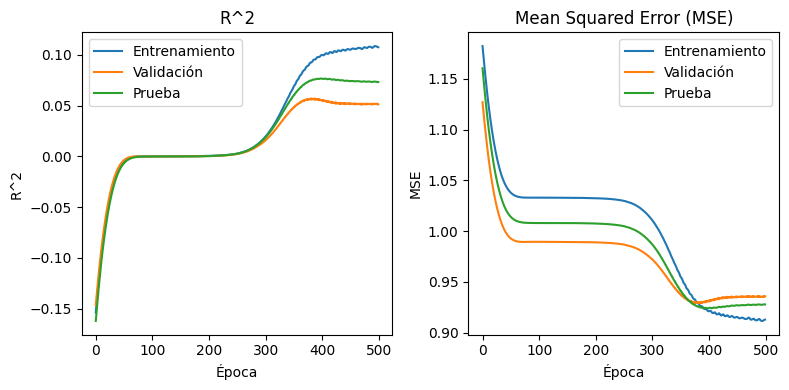

In [ ]:


plt.figure(figsize=(8, 4))
# Gráficas de R2
plt.subplot(1, 2, 1)
plt.plot(train_r2_scores, label='Entrenamiento')
plt.plot(val_r2_scores, label='Validación')
plt.plot(test_r2_scores, label='Prueba')
plt.title('R^2')
plt.xlabel('Época')
plt.ylabel('R^2')
plt.legend()

# Gráficas de MSE
plt.subplot(1, 2, 2)
plt.plot(train_mse_scores, label='Entrenamiento')
plt.plot(val_mse_scores, label='Validación')
plt.plot(test_mse_scores, label='Prueba')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

## Multiple Linear Regression

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Definir el modelo de regresión lineal múltiple
class MultipleLinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(MultipleLinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Dimensiones de entrada y salida
input_size = X_train.shape[1]  # Ajusta según las dimensiones de tus características
output_size = y_train.shape[1]  # Ajusta según la dimensión de la salida

# Crear una instancia del modelo
model = MultipleLinearRegression(input_size, output_size)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Entrenamiento con conjunto de entrenamiento
num_epochs = 500

# Listas para almacenar pérdidas
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validación
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    # Almacenar pérdidas
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Pérdida Entrenamiento: {loss.item():.4f}, Pérdida Validación: {val_loss.item():.4f}')


Época [10/500], Pérdida Entrenamiento: 1.0297, Pérdida Validación: 0.9881
Época [20/500], Pérdida Entrenamiento: 1.0275, Pérdida Validación: 0.9856
Época [30/500], Pérdida Entrenamiento: 1.0254, Pérdida Validación: 0.9833
Época [40/500], Pérdida Entrenamiento: 1.0234, Pérdida Validación: 0.9811
Época [50/500], Pérdida Entrenamiento: 1.0215, Pérdida Validación: 0.9790
Época [60/500], Pérdida Entrenamiento: 1.0196, Pérdida Validación: 0.9770
Época [70/500], Pérdida Entrenamiento: 1.0179, Pérdida Validación: 0.9750
Época [80/500], Pérdida Entrenamiento: 1.0162, Pérdida Validación: 0.9732
Época [90/500], Pérdida Entrenamiento: 1.0146, Pérdida Validación: 0.9714
Época [100/500], Pérdida Entrenamiento: 1.0131, Pérdida Validación: 0.9697
Época [110/500], Pérdida Entrenamiento: 1.0117, Pérdida Validación: 0.9680
Época [120/500], Pérdida Entrenamiento: 1.0103, Pérdida Validación: 0.9665
Época [130/500], Pérdida Entrenamiento: 1.0090, Pérdida Validación: 0.9650
Época [140/500], Pérdida Entrenami